### https://blog.csdn.net/qq_52813185/article/details/131521150

In [1]:
library(ropls)
library(ggplot2)
library(ggsci)
library(Cairo)
library(tidyverse)
library(extrafont)
loadfonts()

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘ggsci’ was built under R version 4.2.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tibble::view()  mask

In [2]:
dataMatrix = read.csv('./metabolomics_data.csv',row.names = 1)

In [3]:
dataMatrix= t(dataMatrix)

In [4]:
sampleMetadata = read.table('./sample.txt',sep = '\t',header =T,row.names = 1)

In [8]:
sampleMetadata$gender = rep(c('F','M'),each = 16)

In [9]:
rownames(sampleMetadata) = gsub('-','.',rownames(sampleMetadata))

In [10]:
variableMetadata = read.csv('./variable.csv',header =T,row.names = 1)

PCA
32 samples x 1319 variables
standard scaling of predictors
      R2X(cum) pre ort
Total     0.56   4   0


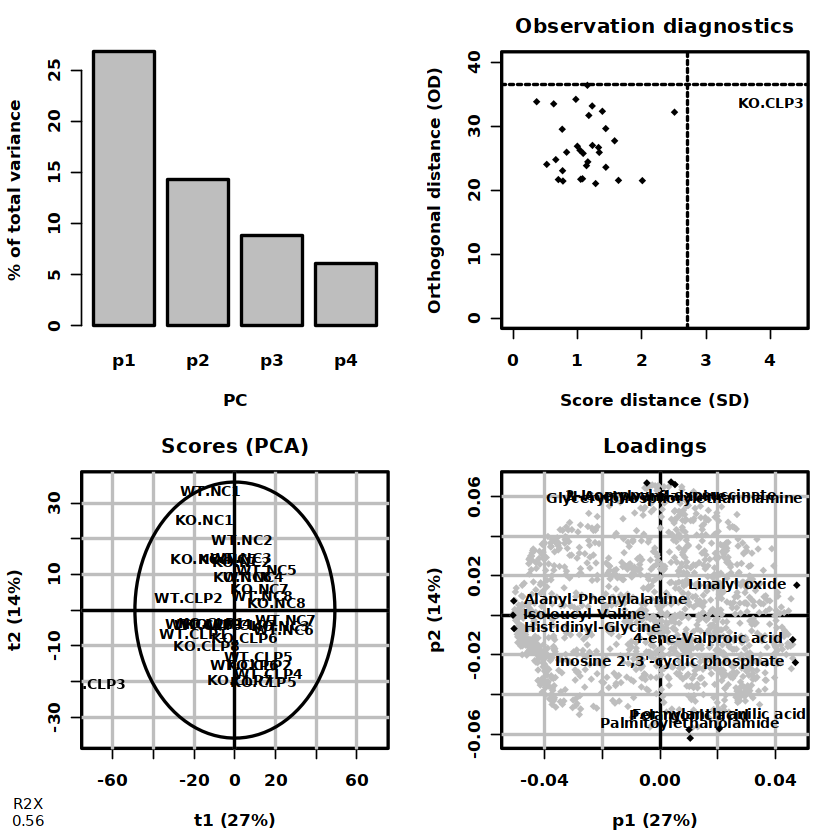

In [11]:
pca = opls(dataMatrix)
genderFc = sampleMetadata[, "gender"]

PCA
32 samples x 1319 variables
standard scaling of predictors
      R2X(cum) pre ort
Total     0.56   4   0


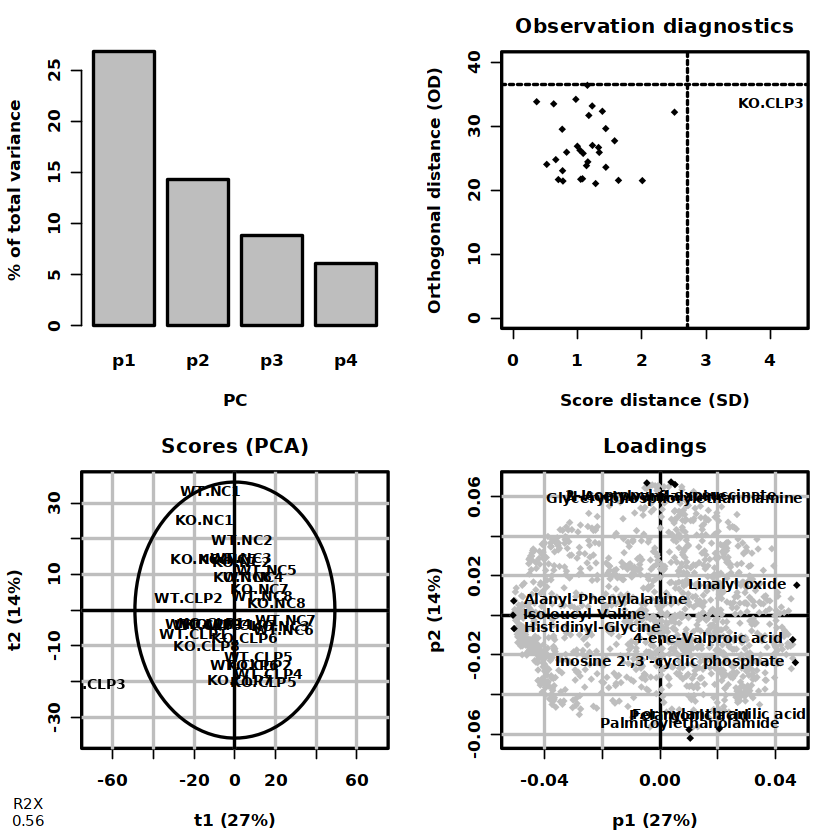

In [12]:
pca = opls(dataMatrix)
groupFc = factor(sampleMetadata[,'group'],levels = c('KO-CLP','KO-NC','WT-CLP','WT-NC'))

In [13]:
plot(pca, typeVc = "x-score",
     parAsColFcVn = genderFc, parEllipsesL = TRUE)

ERROR: Error: 'parAsColFcVn' vector length must be equal to the number of 'x' rows


In [6]:
head(dataMatrix,2)

,"LysoPC(20:4(5Z,8Z,11Z,14Z))",LysoPC(18:0),LysoPC(16:0),7-Ketodeoxycholic acid,LysoPC(18:1(11Z)),LysoPC(15:0),"LysoPC(22:6(4Z,7Z,10Z,13Z,16Z,19Z))",LysoPC(17:0),LysoPC(16:1(9Z)/0:0),"LysoPC(20:4(8Z,11Z,14Z,17Z))",⋯,dTDP-D-glucose,Tuftsin,Methyl (methylthio)methyl disulfide,L-Cysteinylglycine disulfide,5-Phosphoribosylamine,"Beta-1,4-mannose-N-acetylglucosamine",Phenylglucuronide,5-Hydroxykynurenamine,S-Acetyldihydrolipoamide-E,Pregnanediol-3-glucuronide
KO.CLP1,86674.91,2009726,1579108,460947.8,279205.2,23669.76,283190.5,45508.02,80256.25,420584.5,⋯,2316.698,8702.270,835.5999,9006.238,1193.460,3510.625,383.3886,448.3495,12784.52,3382.5189730
KO.CLP2,218881.88,3334212,3615410,115990.3,767694.3,56142.91,329416.0,83720.95,207267.48,877852.9,⋯,2658.317,4070.373,918.1100,9516.874,1002.674,2782.087,550.0556,685.7913,13629.43,0.0000034


In [7]:
head(groupFc)

ERROR: Error in head(groupFc): object 'groupFc' not found


PLS-DA
32 samples x 1319 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total      0.3     0.48   0.273 0.328   2   0 0.05 0.05


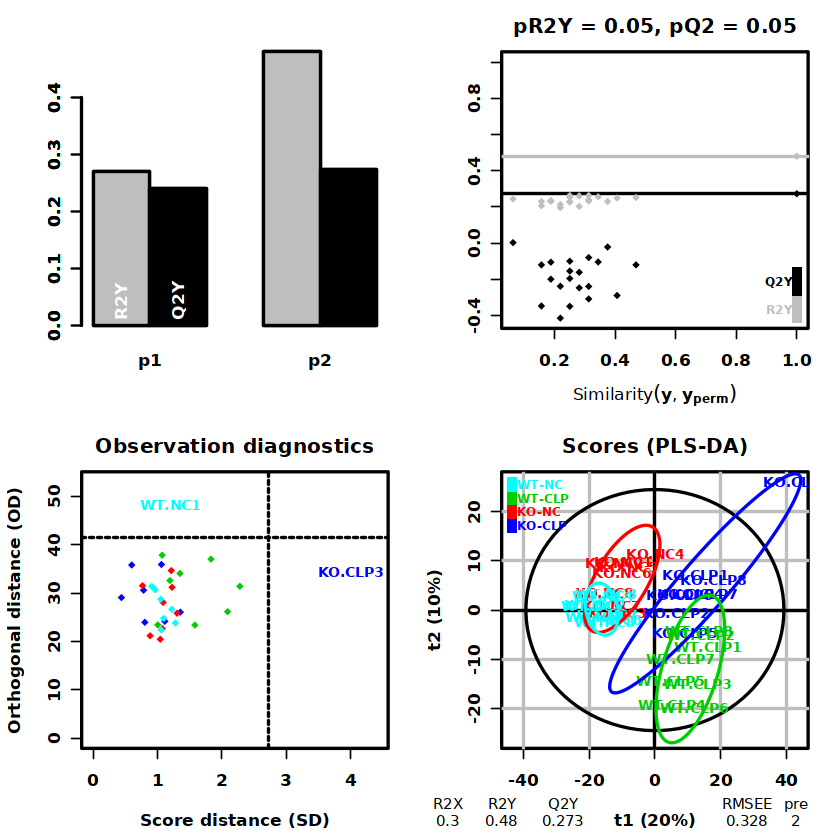

In [16]:
sacurine.plsda <- opls(dataMatrix, groupFc, predI = 2)

In [18]:
sample.score = sacurine.plsda@scoreMN %>% 
  as.data.frame() %>%
  mutate(group = groupFc)

In [19]:
p1 = ggplot(sample.score, aes(p1, p2, color = group)) +
  geom_hline(yintercept = 0, linetype = 'dashed', size = 0.5) +
  geom_vline(xintercept = 0, linetype = 'dashed', size = 0.5) +
  geom_point() +
  geom_point(aes(-10,-10), color = 'white') +
  labs(x = 'P1(10.0%)',y = 'P2(9%)') +
  stat_ellipse(level = 0.95, linetype = 'solid', 
               size = 1, show.legend = FALSE) +
  #scale_color_manual(values = c('#008000','#FFA74F')) +
  theme_bw() +
  theme(legend.position = c(0.9,0.8),
    legend.text = element_text(color = 'black',size = 12, family = 'Arial', face = 'plain'),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.text = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
    axis.title = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
    axis.ticks = element_line(color = 'black'))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


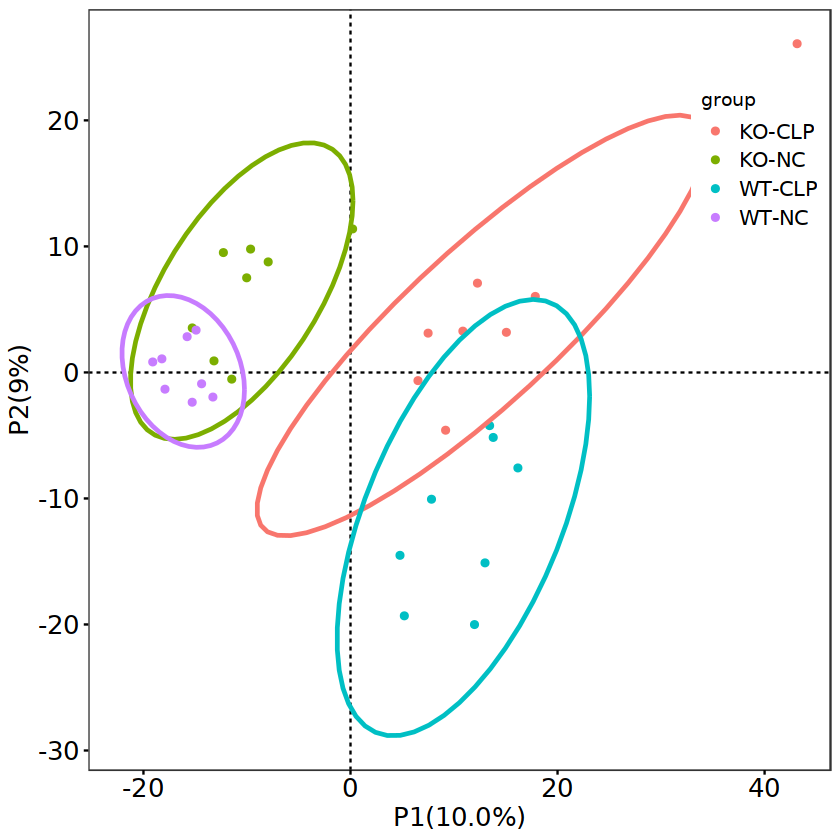

In [20]:
p1

In [21]:
vip.score = as.data.frame(sacurine.plsda@vipVn)
colnames(vip.score) = 'vip'
vip.score$metabolites = rownames(vip.score)
vip.score = vip.score[order(-vip.score$vip),]
vip.score$metabolites = factor(vip.score$metabolites,
                               levels = vip.score$metabolites)

In [23]:

loading.score = sacurine.plsda@loadingMN %>% as.data.frame()
loading.score$metabolites = rownames(loading.score)
 
all.score = merge(vip.score, loading.score, by = 'metabolites')
 
all.score$cat = paste('A',1:nrow(all.score), sep = '')

In [24]:

p2 = ggplot(all.score[all.score$vip >= 1,], aes(cat, vip)) +
  geom_segment(aes(x = cat, xend = cat,
                   y = 0, yend = vip)) +
  geom_point(shape = 21, size = 5, color = '#008000' ,fill = '#008000') +
  geom_point(aes(1,2.5), color = 'white') +
  geom_hline(yintercept = 1, linetype = 'dashed') +
  scale_y_continuous(expand = c(0,0)) +
  labs(x = '', y = 'VIP value') +
  theme_bw() +
  theme(legend.position = 'none',
        legend.text = element_text(color = 'black',size = 12, family = 'Arial', face = 'plain'),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        axis.text = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
        axis.text.x = element_text(angle = 90),
        axis.title = element_text(color = 'black',size = 15, family = 'Arial', face = 'plain'),
        axis.ticks = element_line(color = 'black'),
        axis.ticks.x = element_blank())


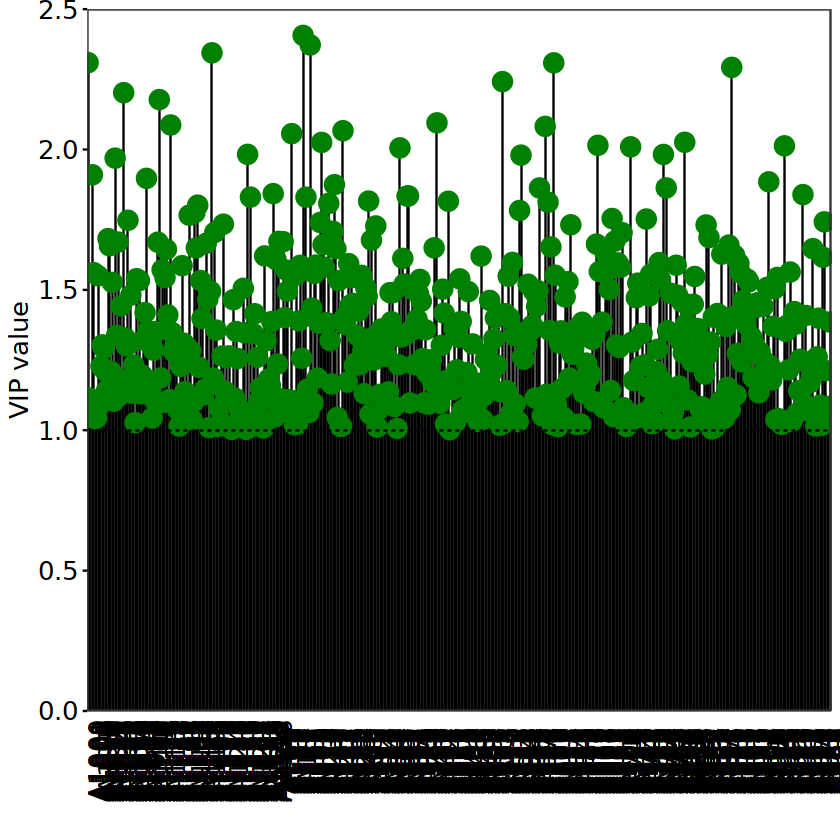

In [25]:
p2

In [43]:
Sys.setlocale('LC_ALL','C')

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [51]:
aa = cbind(as.data.frame(all.score$metabolites),all.score$vip)

In [52]:
colnames(aa) = c('metabolites','vip')

In [56]:
write.csv(aa,file = 'vip.csv',row.names =F)